In [157]:
#Packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pmdarima import auto_arima

## Cleaning and Organizing Data

In [158]:
# file names
## training
### subject 1-30
train_subject_f = "UCI_HAR_Dataset/train/subject_train.txt"
### features
x_train_f = "UCI_HAR_Dataset/train/X_train.txt"
### classification 
y_train_f = "UCI_HAR_Dataset/train/y_train.txt"

## testing
### subject 1-30
test_subject_f = "UCI_HAR_Dataset/test/subject_test.txt"
### features
x_test_f = "UCI_HAR_Dataset/test/X_test.txt"
### classification 
y_test_f = "UCI_HAR_Dataset/test/y_test.txt"

## inertial signal file example (most likely will not use for project)
#inertia_train_f = "UCI_HAR_Dataset/train/Inertial Signals/body_acc_x_train.txt"
#inertia_train_df=pd.read_fwf(inertia_train_f, header=None)

In [159]:
# training data frames
train_subject_df = pd.read_csv(train_subject_f, sep=' ', header=None)
x_train_df = pd.read_fwf(x_train_f, header=None)
y_train_df = pd.read_csv(y_train_f, sep=' ', header=None)

# testing dataframes
test_subject_df = pd.read_csv(test_subject_f, sep=' ', header=None)
x_test_df = pd.read_fwf(x_test_f, header=None)
y_test_df = pd.read_csv(y_test_f, sep=' ', header=None)

In [160]:
# combine subject information with training/testing data frames
x_train_df.insert(0, "subject", train_subject_df)
x_test_df.insert(0, "subject", test_subject_df)

In [161]:
# check data frame
x_train_df.head()


,subject,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [162]:
x_train_df.describe()

,subject,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,17.413085,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,8.975143,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,19.000000,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,26.000000,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,30.000000,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [163]:
y_train_df.describe()

,0
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [164]:
# Combine the DataFrames
combined_df = pd.concat([x_train_df, x_test_df], ignore_index=True)
combined_states = pd.concat([y_train_df, y_test_df], ignore_index=True)

# Drop the 'subject' column temporarily for PCA
subject_column = combined_df['subject']
x_train_mod = combined_df.drop(columns=['subject'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train_mod)


# Apply PCA
pca = PCA(n_components=0.9,copy=True)  # Keep 90% of the variance
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result)


No handles with labels found to put in legend.


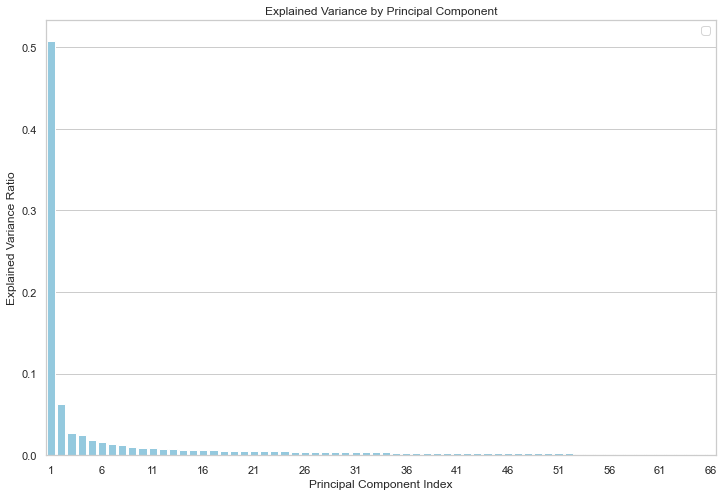

In [165]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(12, 8))
sns.barplot(x=np.arange(1, pca.n_components_ + 1), y=pca.explained_variance_ratio_, color="skyblue")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, pca.n_components_ + 1, 5))

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.show()

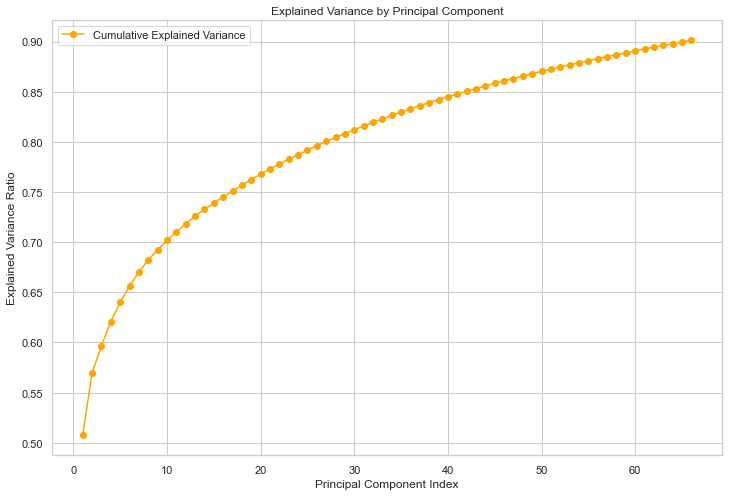

In [166]:
# Plot the explained variance ratio for each principal component
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.show()

# Concatenate the 'subject' column back to the DataFrame
reduced_df = pd.concat([subject_column, pca_df], axis=1)

#Inserting the States to the df 
reduced_df.insert(1, "state", combined_states)

In [167]:
# Concatenate the 'subject' column back to the DataFrame
reduced_df = pd.concat([subject_column, pca_df], axis=1)

#Inserting the States to the df 
reduced_df.insert(1, "state", combined_states)

# Now 'pca_df' contains the 'subject' column and the principal components that capture 90% of the variance

## Plotting 2 Subject States 

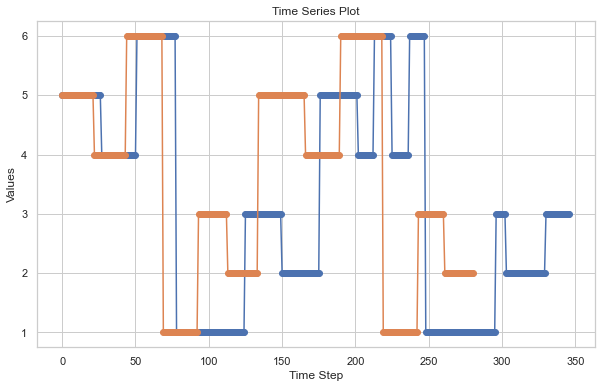

In [168]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reduced_df["state"][reduced_df["subject"]==1].reset_index(drop=True), marker='o', linestyle='-')
plt.plot(reduced_df["state"][reduced_df["subject"]==8].reset_index(drop=True), marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Time Step')
plt.ylabel('Values')
plt.grid(True)
plt.show()

## Splitting Data

In [169]:
#Creating a train and test Dataset depending on time

# Specify the number of steps to predict
forecast_steps = 50

# Group by 'subject' and split into training and test sets
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for subject, group in reduced_df.groupby('subject'):
    # Select the last 50 entries for the test set
    test_subject_df = group.tail(forecast_steps)
    test_df = pd.concat([test_df, test_subject_df])

    # Select the rest for the training set
    train_subject_df = group.iloc[:-forecast_steps]
    train_df = pd.concat([train_df, train_subject_df])

# Reset the index for both DataFrames if needed
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

#Filtering on Subjects
subject_list = list(range(1,25,3))
train_df = train_df[train_df.subject.isin(subject_list)]
test_df = test_df[test_df.subject.isin(subject_list)]

In [178]:
list(range(1,25,3))

[1, 4, 7, 10, 13, 16, 19, 22]

In [170]:
#Define X and y for test and train

X_train = train_df.drop(columns=["state"])
y_train = train_df['state']

X_test = test_df.drop(columns=["state"])
y_test = test_df['state']


## Training Arima

In [171]:
# Create a new DataFrame to store the predictions
prediction_df = pd.DataFrame(columns=['subject'])

# Extract unique subjects from the 'subject' column
subjects = X_train['subject'].unique()

# Iterate over each subject
for subject in subjects:
    # Filter the DataFrame for the current subject
    subject_df = X_train[X_train['subject'] == subject]
    
    # Create a dictionary to store the predictions for each column
    predictions_dict = {'subject': subject}
    
    # Iterate over each quantitative variable column
    for column in subject_df.columns[1:]:  # Assuming the first column is 'subject'
        # Extract time series data for the current column
        time_series_data = subject_df[column].values
        
        # Use pmdarima to automatically select the best ARIMA order
        model = auto_arima(time_series_data, suppress_warnings=True)
        
        # Fit the ARIMA model with the automatically selected order
        model_fit = model.fit(time_series_data)
        
        # Make predictions for the next 50 steps
        forecast = model_fit.predict(n_periods=forecast_steps)
        
        # Add the forecast values to the dictionary
        predictions_dict[str(column) + '_forecast'] = forecast.tolist()
    
    # Append the predictions for the current subject to the new DataFrame
    prediction_df = prediction_df.append(predictions_dict, ignore_index=True)

# The 'prediction_df' DataFrame now contains the subject column and the forecasted values


In [172]:
# Expand the Predictions DF to be useful for
prediction_df_expanded = pd.DataFrame(columns=prediction_df.columns)

for subject in prediction_df["subject"].unique():
    pdft = prediction_df[prediction_df['subject'] == subject]
    prediction_df_corrected = pd.DataFrame()
    prediction_df_corrected['subject'] = pdft['subject'].repeat(forecast_steps).reset_index(drop=True)
    for i in range(len(prediction_df.columns) - 1):
        prediction_df_corrected[f'{i}_forecast'] = prediction_df.iloc[:, i + 1].explode().reset_index(drop=True)
    prediction_df_expanded = pd.concat([prediction_df_expanded,prediction_df_corrected])

prediction_df_expanded.head()

,subject,0_forecast,10_forecast,11_forecast,12_forecast,13_forecast,14_forecast,15_forecast,16_forecast,17_forecast,...,60_forecast,61_forecast,62_forecast,63_forecast,64_forecast,65_forecast,6_forecast,7_forecast,8_forecast,9_forecast
0,1,12.525266,-1.590495,-1.48653,-0.357556,-0.664038,0.718137,0.831911,0.952365,1.04847,...,0.085688,0.645028,2.605423,1.362912,0.443827,-0.173273,0.333068,0.103625,-1.024022,-0.714423
1,1,12.003037,-2.205889,-0.743974,-0.209573,-0.440661,0.922456,0.610449,0.920737,1.412671,...,0.01441,0.296912,-0.323145,3.827196,0.154311,-0.031332,-0.052068,0.032167,-1.563336,-0.310014
2,1,11.954817,-2.205889,-0.169925,-0.122836,-0.174104,0.922456,0.399998,0.910503,1.412671,...,-0.010966,0.296912,0.041891,3.827196,0.038164,0.019017,-0.00362,0.009985,-1.789435,-0.134526
3,1,12.429977,-2.205889,0.273857,-0.071997,-0.087217,0.922456,0.273392,0.907192,1.412671,...,0.008346,0.296912,-1.126435,3.827196,0.004728,0.036376,0.044828,0.0031,-1.884223,-0.058376
4,1,12.458404,-2.205889,0.616933,-0.0422,-0.03887,0.922456,0.183881,0.906121,1.412671,...,-0.006351,0.296912,-0.538289,3.827196,-0.001429,0.041864,0.019391,0.000962,-1.923962,-0.025331


## Train Classifier

In [173]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9525
Confusion Matrix:
[[ 47   0   0]
 [ 14 172   2]
 [  2   1 162]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      1.00      0.85        47
           2       0.99      0.91      0.95       188
           3       0.99      0.98      0.98       165

    accuracy                           0.95       400
   macro avg       0.91      0.97      0.93       400
weighted avg       0.96      0.95      0.95       400



c:\Users\Quick\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
#Use Classifier on Predicted Data:

# Make predictions on the test data
y_pred = model.predict(prediction_df_expanded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.4725
Confusion Matrix:
[[  0  43   4]
 [  0 188   0]
 [  0 164   1]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           2       0.48      1.00      0.64       188
           3       0.20      0.01      0.01       165

    accuracy                           0.47       400
   macro avg       0.23      0.34      0.22       400
weighted avg       0.31      0.47      0.31       400



c:\Users\Quick\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quick\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quick\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Some Visualizations

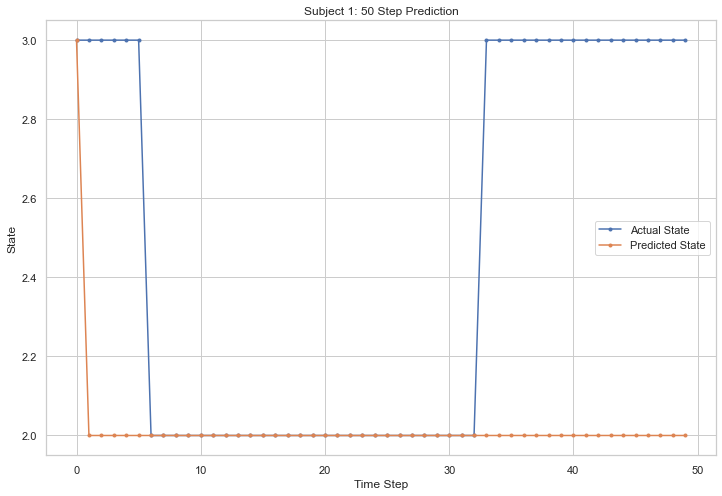

In [175]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(y_test[:50].reset_index(drop=True), marker='.', linestyle='-', label='Actual State')
plt.plot(y_pred[:50], marker='.', linestyle='-', label='Predicted State')
plt.title('Subject 1: 50 Step Prediction')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()  # Add a legend based on the labels provided
plt.grid(True)
plt.show()

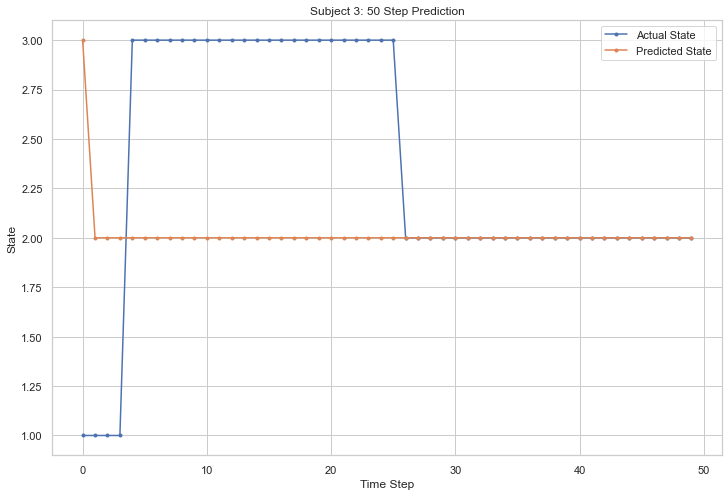

In [176]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(y_test[50:100].reset_index(drop=True), marker='.', linestyle='-', label='Actual State')
plt.plot(y_pred[50:100], marker='.', linestyle='-', label='Predicted State')
plt.title('Subject 3: 50 Step Prediction')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()  # Add a legend based on the labels provided
plt.grid(True)
plt.show()

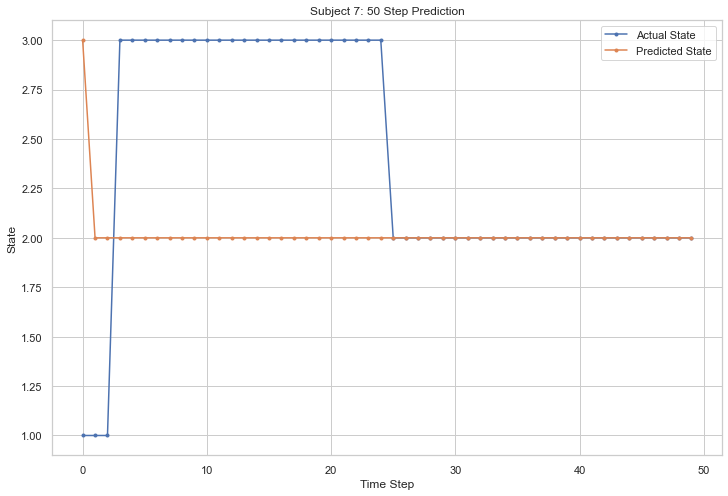

In [177]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(y_test[100:150].reset_index(drop=True), marker='.', linestyle='-', label='Actual State')
plt.plot(y_pred[100:150], marker='.', linestyle='-', label='Predicted State')
plt.title('Subject 7: 50 Step Prediction')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()  # Add a legend based on the labels provided
plt.grid(True)
plt.show()